<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge,Lasso
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df['Price'] = boston.target

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [5]:
X = boston_df.drop('Price', axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
Y = boston_df['Price']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 3)
print(len(x_train),len(x_test))

354 152


In [8]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.coef_

array([-1.28899229e-01,  4.62536564e-02, -5.41974027e-02,  3.83208843e+00,
       -1.24514995e+01,  3.72790367e+00,  7.37824474e-03, -1.19551784e+00,
        2.80152377e-01, -7.75364999e-03, -8.27122705e-01,  1.25331573e-02,
       -5.56644117e-01])

In [10]:
reg.intercept_

28.74495012167192

In [11]:
y_pred = reg.predict(x_test)

In [12]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [13]:
print("RMSE = ",rmse,"R2 SCORE = ",r2)

RMSE =  4.736236488050139 R2 SCORE =  0.7147895265576851


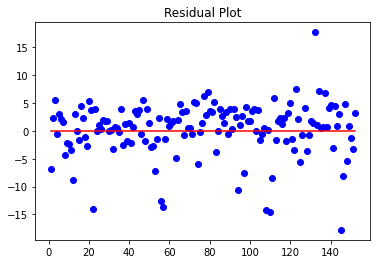

In [14]:
#residual plot

x = [i for i in range(1,len(y_pred)+1)]

x_plot = plt.scatter(x,(y_pred-y_test),c = 'b')
plt.plot(x,[0]*len(y_pred),c = 'r')

plt.title("Residual Plot")
plt.show()

*REGULARIZATION*

In [15]:
predictors = x_train.columns
predictors

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [16]:
coef = pd.Series(reg.coef_,predictors).sort_values()
coef

NOX       -12.451500
DIS        -1.195518
PTRATIO    -0.827123
LSTAT      -0.556644
CRIM       -0.128899
INDUS      -0.054197
TAX        -0.007754
AGE         0.007378
B           0.012533
ZN          0.046254
RAD         0.280152
RM          3.727904
CHAS        3.832088
dtype: float64

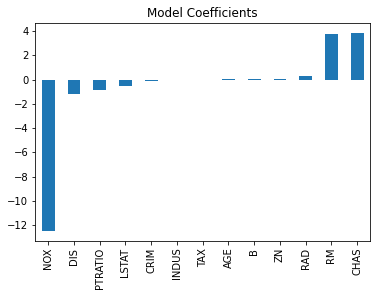

In [17]:
coef.plot(kind = 'bar',title = 'Model Coefficients')

***RIDGE REGRESSION***

L2 Regularization


*   The negativity of highly complex model is, variance is very high





In [18]:
from sklearn.linear_model import Ridge

'''alpha is hyperparameter of ridge, which means that they are not automatically learned
by the model instead they have to be set manually'''

#alpha_range = [0.01, 0.05, 0.5, 5]

'alpha is hyperparameter of ridge, which means that they are not automatically learned\nby the model instead they have to be set manually'

In [19]:
ridgeReg = Ridge(alpha = 0.05, normalize = True)
ridgeReg.fit(x_train,y_train)
pred1 = ridgeReg.predict(x_test)

In [20]:
ridgeReg.coef_    #a1,a2,a3...

array([-1.15388883e-01,  3.74333434e-02, -8.37757462e-02,  3.97990680e+00,
       -9.10775276e+00,  3.88550775e+00,  2.54951279e-03, -9.99075289e-01,
        1.85377273e-01, -3.91572668e-03, -7.67271225e-01,  1.22213285e-02,
       -5.19870233e-01])

In [21]:
ridgeReg.intercept_   #a0 

23.729490113764733

In [22]:
rmse = np.sqrt(mean_squared_error(y_test,pred1))

In [23]:
r2 = r2_score(y_test,pred1)
print("RMSE = ",rmse,"R2 = ",r2)

RMSE= 4.809985941971529 R2 =  0.7058381656181564


In [24]:
df = pd.DataFrame(columns = ['Linear Reg','Ridge Reg'])
for i in range(len(ridgeReg.coef_)):
  df = df.append({'Linear Reg' :reg.coef_[i], 'Ridge Reg' : ridgeReg.coef_[i]}, ignore_index = True)
df

,Linear Reg,Ridge Reg
0,-0.128899,-0.115389
1,0.046254,0.037433
2,-0.054197,-0.083776
3,3.832088,3.979907
4,-12.451500,-9.107753
5,3.727904,3.885508
6,0.007378,0.002550
7,-1.195518,-0.999075
8,0.280152,0.185377
9,-0.007754,-0.003916


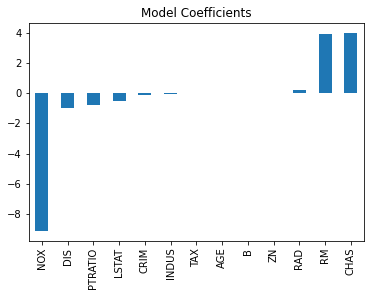

In [25]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

**LASSO REGRESSION**

In [26]:
lassoReg = Lasso(alpha = 0.01, normalize = True)
lassoReg.fit(x_train,y_train)
pred2 = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred2))
r2 = r2_score(y_test,pred2)
print("RMSE = ",rmse)
print("R2 = ",r2)

RMSE =  4.9360889948000555
R2 =  0.6902119411778833


In [27]:
df1 = pd.DataFrame(columns = ['Linear Reg','Ridge Reg','Lasso Reg'])

for i in range(len(ridgeReg.coef_)):
  df1 = df1.append({'Linear Reg' :reg.coef_[i], 'Ridge Reg' :ridgeReg.coef_[i], 'Lasso Reg': lassoReg.coef_[i]},
                 ignore_index = True)
df1

,Linear Reg,Ridge Reg,Lasso Reg
0,-0.128899,-0.115389,-0.073046
1,0.046254,0.037433,0.021283
2,-0.054197,-0.083776,-0.059355
3,3.832088,3.979907,3.582445
4,-12.451500,-9.107753,-2.950966
5,3.727904,3.885508,4.096290
6,0.007378,0.002550,0.000000
7,-1.195518,-0.999075,-0.653914
8,0.280152,0.185377,0.050072
9,-0.007754,-0.003916,-0.000000


RMSE =  4.9360889948000555 R2 =  0.6902119411778833


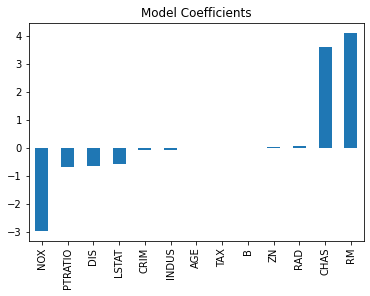

In [28]:
print('RMSE = ',rmse,'R2 = ',r2)
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')